In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import decomposition

In [15]:
data = pd.read_csv("/Users/rituc/data/twitter_data/stream_table1.csv")

In [16]:
data.head()

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,Longitude,Country,Place (as appears on Bio),Profile picture,Followers,Following,Listed,Tweet language (ISO 639-1),Tweet Url
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Husband,Dad,GrandDad,Ordained Minister, Umpire...","Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,US,"East Patchogue, NY",http://pbs.twimg.com/profile_images/3788000007...,386.0,705.0,24.0,en,http://www.twitter.com/BillSchulhoff/status/72...
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,"Viagens, geek, moda, batons laranja, cabelos c...",Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,US,"Grapevine, TX",http://pbs.twimg.com/profile_images/7041760340...,812.0,647.0,16.0,pt,http://www.twitter.com/danipolis/status/721318...
2,721318434169102336,2016-04-16,12:44,Kasey Jacobs,KJacobs27,Norwich University Class of 2017,Good. Morning. #morning #Saturday #diner #VT #...,NaN,NaN,44.199476,-72.504173,US,"Barre, VT",http://pbs.twimg.com/profile_images/7169585649...,179.0,206.0,2.0,en,http://www.twitter.com/KJacobs27/status/721318...
3,721318429844582400,2016-04-16,12:44,Stan Curtis,stncurtis,"transcendental music, art for art's sake, craf...",@gratefuldead recordstoredayus 🌹🌹🌹 @ TOMS M...,NaN,NaN,39.901474,-76.606817,US,"Red Lion, PA",http://pbs.twimg.com/profile_images/6962528246...,1229.0,2071.0,11.0,en,http://www.twitter.com/stncurtis/status/721318...
4,721318429081407488,2016-04-16,12:44,Dave Borzymowski,wi_borzo,When in doubt....Panic.,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,NaN,NaN,43.060849,-87.998309,US,"Wauwatosa, WI",http://pbs.twimg.com/profile_images/6595279129...,129.0,833.0,9.0,en,http://www.twitter.com/wi_borzo/status/7213184...


In [19]:
text = list(data["Tweet content"])

In [43]:
text = text[:100]

In [44]:
vectorizer = CountVectorizer(stop_words='english', min_df=2, max_df=0.8)

In [45]:
dtm = vectorizer.fit_transform(text).toarray()

In [46]:
vocab = np.array(vectorizer.get_feature_names())

In [48]:
vocab[10]

u'ca'

In [49]:
dtm.shape

(100, 86)

In [50]:
len(vocab)

86

In [51]:
data.columns

Index([u'Tweet Id', u'Date', u'Hour', u'User Name', u'Nickname', u'Bio',
       u'Tweet content', u'Favs', u'RTs', u'Latitude', u'Longitude',
       u'Country', u'Place (as appears on Bio)', u'Profile picture',
       u'Followers', u'Following', u'Listed', u'Tweet language (ISO 639-1)',
       u'Tweet Url'],
      dtype='object')

In [52]:
num_topics = 20
num_top_words = 20

In [53]:
clf = decomposition.NMF(n_components=num_topics, random_state=1)

In [54]:
doctopic = clf.fit_transform(dtm)

In [55]:
topic_words = []

In [56]:
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

In [57]:
topic_words

[[u'careerarc',
  u'hiring',
  u'job',
  u'jobs',
  u'hospitality',
  u'va',
  u'senior',
  u'trainee',
  u'north',
  u'food',
  u'great',
  u'nj',
  u'accounting',
  u'amp',
  u'pa',
  u'atlanta',
  u'recommend',
  u'going',
  u'don',
  u'good'],
 [u'home',
  u'care',
  u'health',
  u'bayada',
  u'nurse',
  u'registered',
  u'licensed',
  u'nj',
  u'md',
  u'rn',
  u'jobs',
  u'don',
  u'trainee',
  u'pharmaceutical',
  u'clinical',
  u'details',
  u'want',
  u'work',
  u'accounting',
  u'ga'],
 [u'view',
  u'want',
  u'work',
  u'latest',
  u'opening',
  u'jobs',
  u'hiring',
  u'job',
  u'wi',
  u'ca',
  u'pharmaceutical',
  u'ma',
  u'charlotte',
  u'businessmgmt',
  u'engineering',
  u'healthcare',
  u'veterans',
  u'va',
  u'hospitality',
  u'beach'],
 [u'recommend',
  u'hiring',
  u'job',
  u'clinical',
  u'ga',
  u'atlanta',
  u'pharmaceutical',
  u'nj',
  u'oh',
  u'pa',
  u'va',
  u'hospitality',
  u'manager',
  u'charlotte',
  u'manufacturing',
  u'good',
  u'great',
  u'don

In [58]:
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

/Users/rituc/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [60]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0]])

In [61]:
gmm = GaussianMixture(n_components=20)

In [62]:
gmm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=20, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [63]:
gmm.fit(dtm)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=20, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [64]:
labels = gmm.predict(dtm)

In [65]:
labels

array([ 0,  0,  1,  0,  1,  1,  1, 12,  0,  3,  4,  0,  0,  1,  6,  2,  0,
       15, 10,  1, 18,  1,  1, 10,  4,  1,  8,  5, 16,  1,  3,  5,  1,  1,
        0,  8,  1,  1,  1,  0,  1,  1, 10, 15,  1, 10,  7,  0,  7, 15,  0,
        1,  0,  1,  0,  0,  0, 11,  1,  1,  6,  8, 10,  6,  9,  6,  1, 19,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1, 10, 13, 17, 10, 11,  0,
        2,  4,  1, 14,  1,  1,  9,  0,  1,  1,  1,  0, 11,  1,  1])

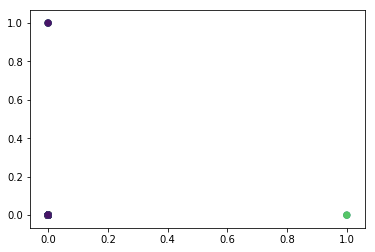

In [67]:
plt.scatter(dtm[:, 0], dtm[:, 1], c=labels, s=40, cmap='viridis');

In [69]:
probs = gmm.predict_proba(dtm)
print(probs[:5].round(3))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


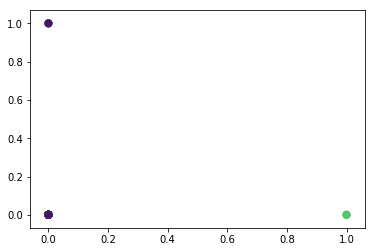

In [72]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(dtm[:, 0], dtm[:, 1], c=labels, cmap='viridis', s=size)

In [75]:
X = dtm

In [76]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [77]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


In [79]:
from sklearn.mixture import GMM

/Users/rituc/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/rituc/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/rituc/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/rituc/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecatio

ValueError: too many values to unpack

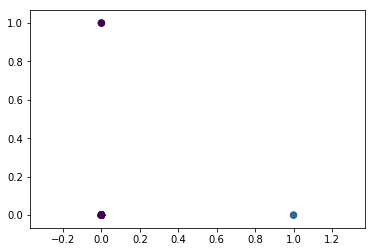

In [80]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)